<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 1</h2>

In [1]:
# Student names and numbers:
# Raluca-Elena Petrovici 279998

The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For most of the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

In [2]:
# Import all necessary libraries here

# Exercise 1: Decision trees

In this exercise we investigate the Boston Housing dataset, which we treat as a classification problem:

In [3]:
from sklearn.datasets import load_boston
data = load_boston()

import numpy as np
from sklearn.model_selection import train_test_split
c = np.array([1 if y > np.median(data['target']) else 0 for y in data['target']])
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)

### Model learning
**a)** Learn a decision tree using the training data and evaluate its performance on both the training data and the test data. Generate random training/test partitions or varying sizes and analyze how the accuracy results vary (consult the documentation for `train_test_split(.)`).

### Model analysis

**b)** Display the decision tree learned using the training data.

**c)** What are the most important features as determined by the learned tree and does, e.g., the choice of top node seem reasonable to you?

**d)** How does the features deemed *most important* by the decision tree learner match the generated tree and your understanding of house prices?

### Model complexity

**e)** Try controlling the complexity of the learned decision tree by adjusting the parameters max\_depth, min\_samples\_split, min\_samples\_leaf

**f)** Investigate the effect when changing these parameters:
    - Visualize (some of) the trees
    - Evaluate the performance of the models on both the training data and the test data
    
**g)** Try to find good parameter values using cross-validation. How does the obtained parameters match your manual investigation?

# Exercise 2: Regression with random forest

For this exercise we will use the nycflights dataset ("flights.csv").

So far, we have only considered how to use decision trees and random forests for classification. However, both algorithms can also be used for regression tasks, as we will see in the exercises below.

### Preprocessing

**a)** Load the data, and consider how you want to handle missing values and categorical variables (you may choose to remove some features entirely). Carefully consider which variables are categorical. Normalize all relevant variables.

**b)** In the following, we are going to determine which factors cause departure time delays, and try to predict the length of these delays. However, for several departures, a *negative* delay have been reported. How do you interpret a negative delay? Consider if you want to modify the negative delays in some way. 

### Regression analysis: Predicting departure time delays

**c)** Extract the features and the target variable (in this case the departure time delays) from the dataframe. Split the dataset into test and train sets (technically, we ought to have done this before preprocessing. For the sake of simplicity, we do not conform to this best practice in this exercise).

**d)** Train a decision tree regressor for predicting departure time delays (you might want to experiment with a few different values of the hyperparameters to avoid too much overfitting). Plot the tree, and explain how decision trees can be used for regression analyses.

**e)** Do a regression analysis as the one above, but using a random forest instead of a single decision tree. Use a grid-search to determine a good set of hyperparameters. When you have found the best model, score your model on the test set. Comment on the result. 

**f)** Plot the feature importances determined by the tree. Which feature is the most important? Do you have any idea as to why? Remove any features which cannot be used to predict departure time delays in any meaningful way, and redo the analysis. Comment on your results.

### Regression analysis: Predicting arrival time delays

In the last part of the exercise, we are going to try to predict arrival time delays as a function of departure time delays - it might be of interest to know how large a delay one should expect after the plane has departed from the airport. 

**g)** Train a decision tree or random forest regressor and an OLS to the dataset, and see how well arrival time delay. can be predicted based on departure time delay. 

**h)** Plot the arrival time delays as a function of the departure time delay, and show the predictions from each of the two regressors.

**i)** Based on the results obtained above, make a plot that extrapolates a little bit in order to predict delays slightly larger than the largest delay found in the dataset. Which model do you think gives the most trustworthy extrapolation? 

# Exercise 3: SVM

In this exercise we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0-9 at a resolution of 28x28 pixels. In the cell below, the dataset is loaded and split into 60000 traning and 10000 testing images, and reshaped into the appropriate shape for an SVM classifier.

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

ModuleNotFoundError: No module named 'keras'

The code-snippet below can be used to see the images corresponding to individual digits:

In [ ]:
import matplotlib.pyplot as plt
index = 1

plt.imshow(x_train[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

In [ ]:
import numpy as np

digit0=3
digit1=7
x_bin_train=x_train[np.logical_or(y_train==digit0,y_train==digit1)]
y_bin_train=y_train[np.logical_or(y_train==digit0,y_train==digit1)]

x_bin_test=x_test[np.logical_or(y_test==digit0,y_test==digit1)]
y_bin_test=y_test[np.logical_or(y_test==digit0,y_test==digit1)]

print("The first training datapoint now is: \n")
plt.imshow(x_bin_train[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(y_bin_train[0])

### Training an SVM model

**a)** Learn different SVM models by varying e.g. the kernel functions and/or the C- and gamma-parameters. For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. *Caution*: for some configurations, learning here can take a little while (several minutes).

**b)** Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? (Hint: you can e.g. use the numpy where() function to extract the indices of the test cases that were misclassified: `misclass = np.where(test != predictions)` )
 

**c)** How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

**d)** Explain how a binary classifier, such as an SVM, can be applied to a multiclass classification problem, such as recognizing all 10 digits in the MNIST dataset (no coding required in this exercise!).

**e)** Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels (see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

### Cheating

We next investigate the capability of the different learning approaches to find a good model, knowing that a very accurate model exists. For this, we add a 'cheat column' to our data: we add an additional column to the data matrix that simply contains a 0/1 encoding of the actual class label: 

In [ ]:
#adding cheating information to the training data:
cheatcol_train=np.array(y_bin_train) #making a copy of the original target array
cheatcol_train[cheatcol_train==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol_train[cheatcol_train==digit1]=1
cheatcol_train=cheatcol_train.reshape(-1,1) #getting the dimensions right for the following .hstack operation to work ... 
x_bin_cheat_train = np.hstack((x_bin_train,cheatcol_train))

#adding cheating information to the training data:
cheatcol_test=np.array(y_bin_test) #making a copy of the original target array
cheatcol_test[cheatcol_test==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol_test[cheatcol_test==digit1]=1
cheatcol_test=cheatcol_test.reshape(-1,1) #getting the dimensions right for the following .hstack operation to work ... 
x_bin_cheat_test = np.hstack((x_bin_test,cheatcol_test))

The SVM-model is, in principle, able to construct a 100% accurate classifier for this data: we only have to 'learn' that only the last column in the data matters. 

**f)** Describe, briefly, how the coefficients and weights of an SVM model would have to be set, so that the resulting model is 100% accurate on this cheating data. This part of the exercise does not involve any code. Just give your answer in a short text.

**g)** Investigate how the accuracy of different SVM classifiers improves in practice on this new dataset. Do you achieve 100% accuracy on the test set? If not, try to change the encoding in the cheat column: instead of representing digit1 with a 1, use a larger number, e.g. 250. Does that help? Why?

# Exercise 4: Data exploration and logistic regression

In this exercise, you are going to investigate student dropout based on the dataset "churn.cvs". This is a real dataset, and there is no single "correct" way to use it (however, there are several wrong ones!). Your exercise is to explore one or more possible use cases, and document the one(s) you find the most fruitful/interesting.  Your work should probably include the steps below:

- An investigation of the data, using e.g. FACETs, Pandas, and/or whatever other tools you prefer. Can you find any interesting correlations? Are there problematic features or rows in the dataset?
- Handle missing data and possible outliers (in each case, consider what you want to do: Remove row? Remove column? Insert custom value?).
- Normalize/bin/create dummy variables where relevant. 
- Determine what you would like to predict, i.e. choose your target variable. Try formulating a specific usecase for your experiment (e.g. "Given a students perfomance in high school and first semester, what is the probability that he/she churns in the 2. semester?")
- Train a logistic regression and at least one other algorithm on the data. Use either manual tuning or cross validation to find a good set of hyperparameters for each model. Do you see any specific advantages in using a logistic regression in this case?
- What features seem to be important for predicting whether a student is likely to drop out?

Warning: Make sure you carefully consider what information is available at the time where a prediction is to be made - for example, it doesn't make any sense to try to predict if a student churns in semester 1, if you include a feature which tells that this student churned in semester 2!  So depending on your specific use case, you should probably remove some columns and/or rows before you train your model.

##### We will predict if a student will drop out (churned_all), based on their admission data (all columns, excluding the first semester fields), so that a university could use a student's data prior to admission to estimate whether that student is likely to drop out or not

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("churn.csv")

We want to clean all the data at first and drop the unnecessary columns.

In [51]:
print(data.columns)

Index(['Nationality', 'Age_at_studystart', 'Study_programme',
       'Study_programme_code', 'Studystart_date', 'Studystart_month',
       'Studystart_year', 'Studyend_month', 'Studyend_year',
       'University_institute', 'Status', 'Exam_year',
       'Exam_grade_point_average', 'Grading_scale', 'Exam_type',
       'Priority_number', 'Quote', 'Passed_ects_SEM1',
       'Grade_point_average_SEM1', 'SU_clips_used', 'Years_since_exam',
       'CHURNED_ALL', 'CHURNED_IN_SEM1', 'CHURNED_IN_SEM2',
       'CHURNED_AFTER_SEM1', 'CHURNED_AFTER_SEM2', 'CHURNED_SEM2THROUGHSEM3'],
      dtype='object')


The columns that are irrelevant and can be dropped right away are: Studyend_month, Studyend_year, Status, Passed_ects_SEM1, Grade_point_average_SEM1, SU_clips_used.
We also have columns that are irrelevant, but need are needed for data preparation: 'CHURNED_IN_SEM1', 'CHURNED_IN_SEM2', 'CHURNED_AFTER_SEM1', 'CHURNED_AFTER_SEM2', 'CHURNED_SEM2THROUGHSEM3'

In [52]:
data=data.drop(columns=['Studyend_month', 'Studyend_year', 'Status', 'Passed_ects_SEM1', 'Grade_point_average_SEM1', 'SU_clips_used'])
print(data.columns)

Index(['Nationality', 'Age_at_studystart', 'Study_programme',
       'Study_programme_code', 'Studystart_date', 'Studystart_month',
       'Studystart_year', 'University_institute', 'Exam_year',
       'Exam_grade_point_average', 'Grading_scale', 'Exam_type',
       'Priority_number', 'Quote', 'Years_since_exam', 'CHURNED_ALL',
       'CHURNED_IN_SEM1', 'CHURNED_IN_SEM2', 'CHURNED_AFTER_SEM1',
       'CHURNED_AFTER_SEM2', 'CHURNED_SEM2THROUGHSEM3'],
      dtype='object')


Handling missing data first
Checking that these columns don't have nulls

In [55]:
print(data['Nationality'].isnull().values.any())
print(data['Study_programme'].isnull().values.any())
print(data['Studystart_date'].isnull().values.any())
print(data['Studystart_month'].isnull().values.any())
print(data['Studystart_year'].isnull().values.any())
print(data['Exam_year'].isnull().values.any())
print(data['Exam_grade_point_average'].isnull().values.any())
print(data['Years_since_exam'].isnull().values.any())
print(data['CHURNED_ALL'].isnull().values.any())
print(data['CHURNED_IN_SEM1'].isnull().values.any())
print(data['CHURNED_IN_SEM2'].isnull().values.any())
print(data['CHURNED_AFTER_SEM1'].isnull().values.any())
print(data['CHURNED_AFTER_SEM2'].isnull().values.any())
print(data['CHURNED_SEM2THROUGHSEM3'].isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [54]:
print("Number of null values in Quote: ", data['Quote'].isnull().sum())
print("Number of null values in Grading_scale: ", data['Grading_scale'].isnull().sum())
print("Number of null values in Exam_type: ", data['Exam_type'].isnull().sum())
print("Number of null values in Priority_number: ", data['Priority_number'].isnull().sum())

Number of null values in Quote:  86
Number of null values in Grading_scale:  58
Number of null values in Exam_type:  68
Number of null values in Priority_number:  1


0        1.0
1        1.0
2       21.0
3        6.0
4        1.0
        ... 
1995     1.0
1996     1.0
1997     1.0
1998     1.0
1999     1.0
Name: Priority_number, Length: 2000, dtype: float64

For the missing priority number, we'll just insert the mode value of the column

In [56]:
data['Priority_number'].fillna(data['Priority_number'].mode().iat[0])

0        1.0
1        1.0
2       21.0
3        6.0
4        1.0
        ... 
1995     1.0
1996     1.0
1997     1.0
1998     1.0
1999     1.0
Name: Priority_number, Length: 2000, dtype: float64

Quote, Grading_scale and Exam_type are important features, and we don't want to badly assume their values and build a bad model, so we want to drop the entries that have null values in these columns.

Since there is only one student without a known age in the dataset, we can either just drop that entry or we could add a dummy value, like the mean, or mode of the Age_at_studystart column

In [57]:
print("Number of null values in Age_at_studystart: ", data['Age_at_studystart'].isnull().sum())
data['Age_at_studystart'] = data['Age_at_studystart'].fillna(data['Age_at_studystart'].mode()[0])
print("Number of null values in Age_at_studystart: ", data['Age_at_studystart'].isnull().sum())

Number of null values in Age_at_studystart:  1
Number of null values in Age_at_studystart:  0


University_institute has one missing value, so we will just drop the entry later.

In [58]:
print("Number of null values in University_institute: ", data['University_institute'].isnull().sum())

Number of null values in University_institute:  1


At this point, all of the columns with null values that we wanted to handle were handled, so we can drop the entries with null values in the other columns.

In [59]:
data=data.dropna()
print(data.shape)
data

(1795, 21)


,Nationality,Age_at_studystart,Study_programme,Study_programme_code,Studystart_date,Studystart_month,Studystart_year,University_institute,Exam_year,Exam_grade_point_average,...,Exam_type,Priority_number,Quote,Years_since_exam,CHURNED_ALL,CHURNED_IN_SEM1,CHURNED_IN_SEM2,CHURNED_AFTER_SEM1,CHURNED_AFTER_SEM2,CHURNED_SEM2THROUGHSEM3
0,Danmark,20.7,litteraturvidenskab,HFMA00001T,9/1/2013,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,8.0,...,Studentereksamen (2008 og senere),1.0,2.0,1,1,1,0,0,0,0
1,Danmark,22.4,dansk,HRVA00001T,9/1/2013,9,2013,Institut for Kunst og Kulturvidenskab,2015,4.9,...,Studentereksamen (2008 og senere),1.0,1.0,1,0,0,0,0,0,0
2,Danmark,20.9,informationsvidenskab og kulturformidling,HTEA00001T,9/1/2014,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,4.8,...,Studentereksamen,21.0,1.0,1,0,1,0,0,0,0
3,Danmark,21.3,paedagogik,HTEA00001T,9/1/2016,9,2013,Institut for Engelsk. Germansk og Romansk,2012,4.1,...,Studentereksamen (2008 og senere),6.0,1.0,23,0,1,0,0,0,0
4,Sverige,19.9,audiologopaedi,HKMA00001T,9/1/2014,9,2013,Institut for Medier. Erkendelse og Formidling,2012,8.5,...,Studentereksamen (2008 og senere),1.0,1.0,3,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Danmark,24.2,informationsvidenskab og kulturformidling,HFRA00001T,9/1/2015,9,2016,Institut for Tvaerkulturelle og regionale studier,2014,11.3,...,Studentereksamen (2008 og senere),1.0,1.0,0,0,0,0,0,0,0
1996,Danmark,61.6,koreastudier,HDAA00001T,9/1/2016,9,2016,Institut for Kunst og Kulturvidenskab,2014,0.0,...,Studentereksamen,1.0,1.0,-1,0,1,0,0,0,0
1997,Danmark,23.3,kinastudier,HENA00001T,9/1/2016,9,2016,Institut for Nordiske Studier og Sprogvidenskab,2008,2.7,...,Studentereksamen (2008 og senere),1.0,1.0,0,1,0,0,0,0,0
1998,Danmark,22.1,dansk,HHIA00001T,9/1/2014,9,2016,Institut for Engelsk. Germansk og Romansk,2012,6.8,...,Studentereksamen (2008 og senere),1.0,1.0,1,0,0,0,0,0,0


We need to make sure that CHURNED_ALL column is filled with 1 only if one of the other CHURNED_* fields are filled with one. If the others are all 0, and CHURNED_ALL is 1, then we drop the entry. If CHURNED_ALL is 0, but any of the others are true, we drop it as well.

In [61]:
data = data.reset_index(drop=True)
for i in range(len(data.index)):
    if (data.at[i,'CHURNED_IN_SEM1'] == 1 or data.at[i,'CHURNED_IN_SEM2'] == 1 or data.at[i,'CHURNED_AFTER_SEM1'] == 1 or data.at[i,'CHURNED_AFTER_SEM2'] == 1 or data.at[i,'CHURNED_SEM2THROUGHSEM3'] == 1) and data.at[i,'CHURNED_ALL'] == 0:
        data.drop(i)
    if (data.at[i,'CHURNED_IN_SEM1'] == 0 and data.at[i,'CHURNED_IN_SEM2'] == 0 and data.at[i,'CHURNED_AFTER_SEM1'] == 0 and data.at[i,'CHURNED_AFTER_SEM2'] == 0 and data.at[i,'CHURNED_SEM2THROUGHSEM3'] == 0) and data.at[i,'CHURNED_ALL'] == 1:
               data.drop(i)
data = data.reset_index(drop=True)
data

,Nationality,Age_at_studystart,Study_programme,Study_programme_code,Studystart_date,Studystart_month,Studystart_year,University_institute,Exam_year,Exam_grade_point_average,...,Exam_type,Priority_number,Quote,Years_since_exam,CHURNED_ALL,CHURNED_IN_SEM1,CHURNED_IN_SEM2,CHURNED_AFTER_SEM1,CHURNED_AFTER_SEM2,CHURNED_SEM2THROUGHSEM3
0,Danmark,20.7,litteraturvidenskab,HFMA00001T,9/1/2013,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,8.0,...,Studentereksamen (2008 og senere),1.0,2.0,1,1,1,0,0,0,0
1,Danmark,22.4,dansk,HRVA00001T,9/1/2013,9,2013,Institut for Kunst og Kulturvidenskab,2015,4.9,...,Studentereksamen (2008 og senere),1.0,1.0,1,0,0,0,0,0,0
2,Danmark,20.9,informationsvidenskab og kulturformidling,HTEA00001T,9/1/2014,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,4.8,...,Studentereksamen,21.0,1.0,1,0,1,0,0,0,0
3,Danmark,21.3,paedagogik,HTEA00001T,9/1/2016,9,2013,Institut for Engelsk. Germansk og Romansk,2012,4.1,...,Studentereksamen (2008 og senere),6.0,1.0,23,0,1,0,0,0,0
4,Sverige,19.9,audiologopaedi,HKMA00001T,9/1/2014,9,2013,Institut for Medier. Erkendelse og Formidling,2012,8.5,...,Studentereksamen (2008 og senere),1.0,1.0,3,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,Danmark,24.2,informationsvidenskab og kulturformidling,HFRA00001T,9/1/2015,9,2016,Institut for Tvaerkulturelle og regionale studier,2014,11.3,...,Studentereksamen (2008 og senere),1.0,1.0,0,0,0,0,0,0,0
1791,Danmark,61.6,koreastudier,HDAA00001T,9/1/2016,9,2016,Institut for Kunst og Kulturvidenskab,2014,0.0,...,Studentereksamen,1.0,1.0,-1,0,1,0,0,0,0
1792,Danmark,23.3,kinastudier,HENA00001T,9/1/2016,9,2016,Institut for Nordiske Studier og Sprogvidenskab,2008,2.7,...,Studentereksamen (2008 og senere),1.0,1.0,0,1,0,0,0,0,0
1793,Danmark,22.1,dansk,HHIA00001T,9/1/2014,9,2016,Institut for Engelsk. Germansk og Romansk,2012,6.8,...,Studentereksamen (2008 og senere),1.0,1.0,1,0,0,0,0,0,0


The Quote column is supposed to only have 1 or 2.

In [64]:
data['Quote'].unique()

array([2., 1.])

The Studystart_month columns should only have values from 1 to 12. And Studystart_year and Exam_year should have years within the past few decades, at most.

In [73]:
data['Studystart_month'].unique()

array([9, 2], dtype=int64)

In [75]:
data['Studystart_year'].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

In [76]:
data['Exam_year'].unique()

array([2013, 2015, 2012, 2011, 2008, 1988, 2010, 2016, 2007, 1999, 1900,
       2014, 1986, 2009, 2003, 1992, 2002, 2005, 2004, 1973, 1968, 1970,
       1965, 1994, 2000, 2001, 1997, 2006, 1964, 1987, 1989, 1979, 1969,
       1977, 1990, 1993, 1996, 1983, 1995, 1978, 1972, 1991], dtype=int64)

We handled all the inconsistencies that were relevant for our model, so we can drop the rest of the unnecessary columns:

In [62]:
data=data.drop(columns=['CHURNED_IN_SEM1', 'CHURNED_IN_SEM2', 'CHURNED_AFTER_SEM1', 'CHURNED_AFTER_SEM2', 'CHURNED_SEM2THROUGHSEM3'])
data

,Nationality,Age_at_studystart,Study_programme,Study_programme_code,Studystart_date,Studystart_month,Studystart_year,University_institute,Exam_year,Exam_grade_point_average,Grading_scale,Exam_type,Priority_number,Quote,Years_since_exam,CHURNED_ALL
0,Danmark,20.7,litteraturvidenskab,HFMA00001T,9/1/2013,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,8.0,7-trinsskala,Studentereksamen (2008 og senere),1.0,2.0,1,1
1,Danmark,22.4,dansk,HRVA00001T,9/1/2013,9,2013,Institut for Kunst og Kulturvidenskab,2015,4.9,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,1,0
2,Danmark,20.9,informationsvidenskab og kulturformidling,HTEA00001T,9/1/2014,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,4.8,7-trinsskala,Studentereksamen,21.0,1.0,1,0
3,Danmark,21.3,paedagogik,HTEA00001T,9/1/2016,9,2013,Institut for Engelsk. Germansk og Romansk,2012,4.1,7-trinsskala,Studentereksamen (2008 og senere),6.0,1.0,23,0
4,Sverige,19.9,audiologopaedi,HKMA00001T,9/1/2014,9,2013,Institut for Medier. Erkendelse og Formidling,2012,8.5,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,Danmark,24.2,informationsvidenskab og kulturformidling,HFRA00001T,9/1/2015,9,2016,Institut for Tvaerkulturelle og regionale studier,2014,11.3,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,0,0
1791,Danmark,61.6,koreastudier,HDAA00001T,9/1/2016,9,2016,Institut for Kunst og Kulturvidenskab,2014,0.0,7-trinsskala,Studentereksamen,1.0,1.0,-1,0
1792,Danmark,23.3,kinastudier,HENA00001T,9/1/2016,9,2016,Institut for Nordiske Studier og Sprogvidenskab,2008,2.7,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,0,1
1793,Danmark,22.1,dansk,HHIA00001T,9/1/2014,9,2016,Institut for Engelsk. Germansk og Romansk,2012,6.8,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,1,0


To ensure data correctness, we'll check for outliers in these columns: Age_at_studystart, Years_since_exam

<AxesSubplot:>

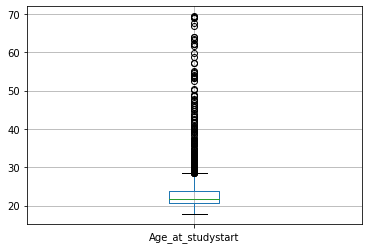

In [72]:
data.boxplot('Age_at_studystart')

Despite the Age_at_studystart having values up to 70, the values are still within a the normal human's life expectancy, so we will assume the values are correct.

<AxesSubplot:>

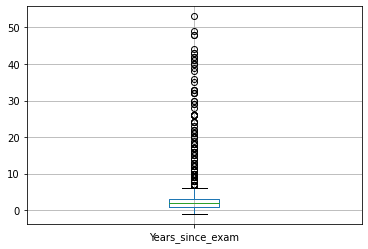

In [77]:
data.boxplot('Years_since_exam')

We can see that we have values below 0, so we would like to drop these entries

<AxesSubplot:>

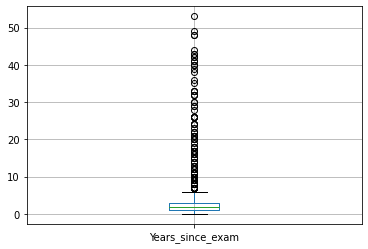

In [81]:
data.drop(data[data['Years_since_exam'] < 0].index, inplace = True)
data.boxplot('Years_since_exam')

In [82]:
data = data.reset_index(drop=True)
data

,Nationality,Age_at_studystart,Study_programme,Study_programme_code,Studystart_date,Studystart_month,Studystart_year,University_institute,Exam_year,Exam_grade_point_average,Grading_scale,Exam_type,Priority_number,Quote,Years_since_exam,CHURNED_ALL
0,Danmark,20.7,litteraturvidenskab,HFMA00001T,9/1/2013,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,8.0,7-trinsskala,Studentereksamen (2008 og senere),1.0,2.0,1,1
1,Danmark,22.4,dansk,HRVA00001T,9/1/2013,9,2013,Institut for Kunst og Kulturvidenskab,2015,4.9,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,1,0
2,Danmark,20.9,informationsvidenskab og kulturformidling,HTEA00001T,9/1/2014,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,4.8,7-trinsskala,Studentereksamen,21.0,1.0,1,0
3,Danmark,21.3,paedagogik,HTEA00001T,9/1/2016,9,2013,Institut for Engelsk. Germansk og Romansk,2012,4.1,7-trinsskala,Studentereksamen (2008 og senere),6.0,1.0,23,0
4,Sverige,19.9,audiologopaedi,HKMA00001T,9/1/2014,9,2013,Institut for Medier. Erkendelse og Formidling,2012,8.5,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,Danmark,21.5,tysk,HKOA00003T,9/1/2014,9,2016,Institut for Nordiske Studier og Sprogvidenskab,2000,7.5,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,4,0
1722,Danmark,24.2,informationsvidenskab og kulturformidling,HFRA00001T,9/1/2015,9,2016,Institut for Tvaerkulturelle og regionale studier,2014,11.3,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,0,0
1723,Danmark,23.3,kinastudier,HENA00001T,9/1/2016,9,2016,Institut for Nordiske Studier og Sprogvidenskab,2008,2.7,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,0,1
1724,Danmark,22.1,dansk,HHIA00001T,9/1/2014,9,2016,Institut for Engelsk. Germansk og Romansk,2012,6.8,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,1,0


In [95]:
#get dummies and then find correlations (correlations won't work if you don't have integer values)
data = pd.get_dummies(data)
# plt.figure(figsize=(16,10))
# sns.heatmap(data.corr(), annot=True)
# plt.show()
cor = data.corr()
cor

,Age_at_studystart,Studystart_month,Studystart_year,Exam_year,Exam_grade_point_average,Priority_number,Quote,Years_since_exam,CHURNED_ALL,Nationality_Afghanistan,...,Exam_type_International Baccalaureate (IB),Exam_type_Konventionsland - nord. studentereksamen,Exam_type_Saerlig tilladelse. dansk grundlag,Exam_type_Saerlig tilladelse. udenlandsk grundlag,Exam_type_Sproglig studentereksamen,Exam_type_Studentereksamen,Exam_type_Studentereksamen (2008 og senere),Exam_type_Studentereksamen fra DIAP,Exam_type_Udenlandsk/ikke aftale-land,Exam_type_Udenlandsk/konventionsland
Age_at_studystart,1.000000,-0.066523,-0.017864,0.040458,0.006149,0.041155,-0.008061,-0.014417,0.023053,0.019295,...,-0.031309,0.015417,-0.005201,-0.005757,0.002338,-0.052349,-0.003482,-0.011474,0.006910,0.053766
Studystart_month,-0.066523,1.000000,-0.062343,-0.021330,-0.006233,-0.057931,0.012557,0.025145,0.017167,0.003773,...,0.006903,0.010963,0.002177,0.003080,0.002177,-0.041018,-0.016830,0.004874,0.005771,0.006171
Studystart_year,-0.017864,-0.062343,1.000000,0.004104,0.026366,0.021502,0.001068,0.017555,-0.139212,-0.013773,...,-0.025198,0.046500,-0.007947,-0.011243,-0.007947,0.001697,-0.041405,-0.017792,-0.021064,0.007912
Exam_year,0.040458,-0.021330,0.004104,1.000000,-0.008689,0.012348,0.006009,-0.004911,-0.009081,0.012845,...,0.012663,-0.007758,0.003002,-0.003552,-0.118279,0.018883,0.006573,-0.004141,0.010878,-0.025475
Exam_grade_point_average,0.006149,-0.006233,0.026366,-0.008689,1.000000,0.005448,0.047961,0.001349,0.012259,0.009253,...,-0.005047,0.022357,0.023136,0.018153,-0.033063,0.020221,-0.031105,0.018244,-0.033725,0.015133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exam_type_Studentereksamen,-0.052349,-0.041018,0.001697,0.018883,0.020221,0.010770,-0.011862,-0.002924,-0.048583,-0.009259,...,-0.016940,-0.026902,-0.005343,-0.007558,-0.005343,1.000000,-0.339334,-0.011961,-0.014160,-0.015142
Exam_type_Studentereksamen (2008 og senere),-0.003482,-0.016830,-0.041405,0.006573,-0.031105,-0.053968,-0.000366,-0.016309,0.029475,0.027287,...,-0.116737,-0.185390,-0.036819,-0.052085,-0.036819,-0.339334,1.000000,-0.082426,-0.097584,-0.104352
Exam_type_Studentereksamen fra DIAP,-0.011474,0.004874,-0.017792,-0.004141,0.018244,0.017471,0.014167,-0.009159,0.024709,-0.002249,...,-0.004115,-0.006535,-0.001298,-0.001836,-0.001298,-0.011961,-0.082426,1.000000,-0.003440,-0.003678
Exam_type_Udenlandsk/ikke aftale-land,0.006910,0.005771,-0.021064,0.010878,-0.033725,0.012917,0.005379,0.008917,-0.030917,-0.002663,...,-0.004871,-0.007736,-0.001536,-0.002173,-0.001536,-0.014160,-0.097584,-0.003440,1.000000,-0.004355


In [98]:
for i in range(len(cor.columns)):
    j = i+1
    while j < len(cor.columns):
        if cor.iloc[i,j] > 0.5 and i != j:
            print(cor.columns[i], " and ", cor.columns[j], " ", cor.iloc[i,j])
        j+=1

Nationality_Makedonien  and  Study_programme_code_HTHA00003T   0.7069017929865052
Nationality_Mexico  and  Study_programme_code_HPEA00001T   0.706901792986506
Nationality_Somalia  and  Study_programme_code_HNAA00001T   0.5770154763118409


These correlations are probably just a coincidence, since in reality these features don't have much to do with eachother

In [ ]:
#train logistic regression with cv

In [ ]:
#train another model

In [ ]:
#find the important features - use PCL